# PAA - Ordenação

## Setup

In [8]:
%pip install -r requirements.txt --quiet

ERROR: Could not find a version that satisfies the requirement bcc==0.29.1 (from versions: 0.1.7, 0.1.8, 0.1.10)
ERROR: No matching distribution found for bcc==0.29.1
Note: you may need to restart the kernel to use updated packages.


### Importação

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## Criação dos valores a serem ordenados

In [2]:
qtd_values = [20_000, 40_000, 60_000]
dados = {
  'Ordem_crescente': [np.arange(1, qtd + 1) for qtd in qtd_values],
  'Ordem_decrescente': [np.arange(qtd, 0, -1) for qtd in qtd_values],
  'Ordem_aleatoria_pemutation': [np.random.permutation(qtd) for qtd in qtd_values]
}

### Exibindo amostragem


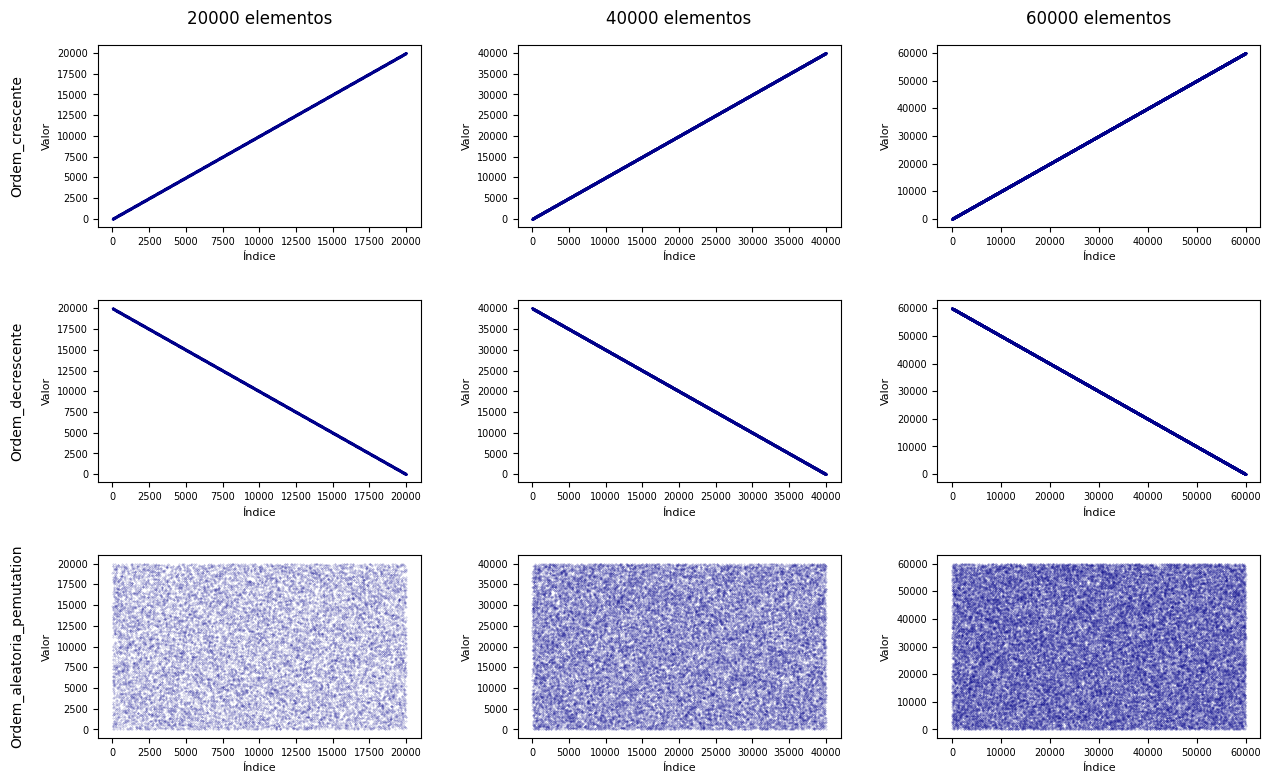

In [45]:
n_rows = len(dados)  # Número de linhas = número de tipos de ordem
n_cols = len(qtd_values)  # Número de colunas = número de tamanhos de dados
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5*n_cols, 3*n_rows))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Títulos das colunas (quantidades)
for ax, qtd in zip(axs[0] if n_rows > 1 else [axs], qtd_values):
    ax.set_title(f'{qtd} elementos', pad=15)

# Plotar cada subgráfico
for row_idx, (ordem, valores) in enumerate(dados.items()):
    for col_idx, arr in enumerate(valores):
        ax = axs[row_idx, col_idx] if n_rows > 1 else axs[col_idx]
        x = np.arange(len(arr))
        ax.scatter(x, arr, s=0.1, alpha=0.3, color='darkblue')
        ax.set_xlabel('Índice', fontsize=8)
        ax.set_ylabel('Valor', fontsize=8)
        ax.tick_params(axis='both', labelsize=7)

    # Rótulo do tipo de ordem
    axs[row_idx, 0].annotate(
        ordem,
        xy=(-0.25 if n_cols <=3 else -0.35, 0.5),  # Ajuste automático de posição
        xycoords='axes fraction',
        rotation=90,
        fontsize=10,
        ha='center',
        va='center'
    )

plt.show()

### Salvando amostragem em txt

In [4]:
paths = []
for title, values in dados.items():
    for i, value in enumerate(values):
        path = f'files/{title}/{len(value)}.csv'
        paths.append(path)
        
        os.makedirs(os.path.dirname(path), exist_ok=True)
        
        df = pd.DataFrame(value)
        df.to_csv(path, index=False, header=False)
        
print(f'Arquivos salvos em {os.path.abspath("files")}')

Arquivos salvos em /home/user/Dev/Kaua/Trabalho-1---PAA/files


## Block Sorting

O tipo de bloco é um algoritmo de classificação que classifica um array dividindo-o em blocos de tamanho fixo, classificando cada bloco individualmente e, em seguida, mesclando os blocos classificados de volta em uma única matriz ordenada. O Block sort é uma boa opção para classificar grandes conjuntos de dados que não cabem na memória. Ele pode classificar eficientemente os dados em blocos que se encaixam na memória e, em seguida, mesclar os blocos classificados juntos para obter a matriz ordenada final.



### Executando o algoritmo para cada amostragem



In [5]:
%%capture results_block_sort
args = "BLOCK_SIZE=5 SHOW_VECTOR_RESULT=0"
results = {}

for path in paths:
    args_copy = args + f" FILE_PATH={path} SIZE_ARR={path.split('/')[-1].split('.')[0]}"
    !make -B block_sort {args_copy}

### Log de execução

In [35]:
print(results_block_sort)

files/Ordem_crescente/20000.csv 0.107371
files/Ordem_crescente/40000.csv 0.358026
files/Ordem_crescente/60000.csv 0.829938
files/Ordem_decrescente/20000.csv 0.129287
files/Ordem_decrescente/40000.csv 0.490492
files/Ordem_decrescente/60000.csv 1.078354
files/Ordem_aleatoria_pemutation/20000.csv 0.124319
files/Ordem_aleatoria_pemutation/40000.csv 0.605994
files/Ordem_aleatoria_pemutation/60000.csv 1.533177



### Formatando o logs

In [34]:
data_processing = {}

for line in str(results_block_sort.stdout).splitlines():
  type_ = line.split('/')[1]
  temp = line.split(' ')[-1]
  qtd = line.split('/')[-1].split('.')[0]
  if not data_processing.get(type_):
    data_processing[type_] = {qtd: temp}
  else:
    data_processing[type_][qtd] = temp

print(data_processing)

{'Ordem_crescente': {'20000': '0.107371', '40000': '0.358026', '60000': '0.829938'}, 'Ordem_decrescente': {'20000': '0.129287', '40000': '0.490492', '60000': '1.078354'}, 'Ordem_aleatoria_pemutation': {'20000': '0.124319', '40000': '0.605994', '60000': '1.533177'}}


### Exibição dos valores adquiridos

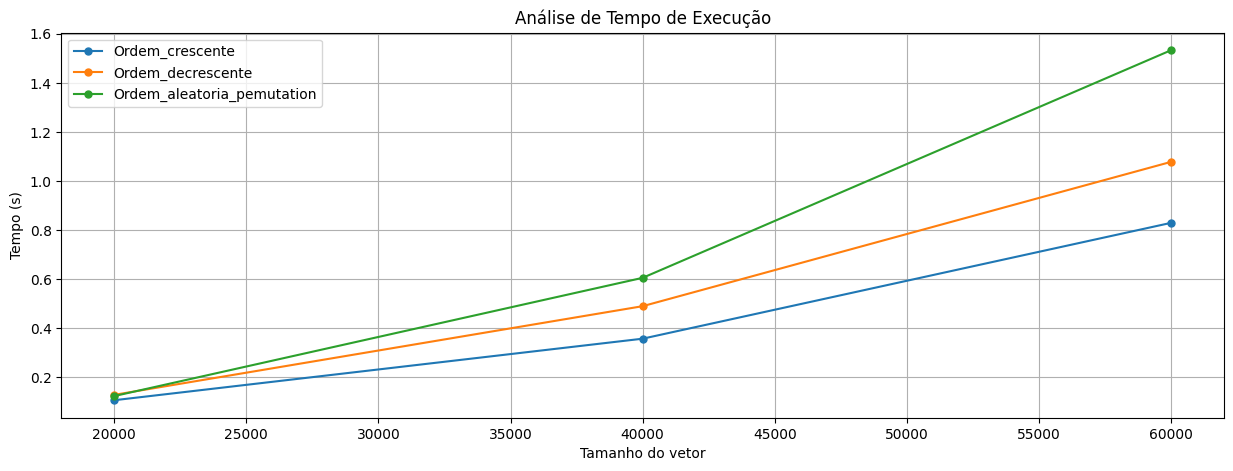

In [46]:
plt.figure(figsize=(15, 5))
plt.title('Análise de Tempo de Execução')
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo (s)')
for type_, data in data_processing.items():
    x = list(map(int, data.keys()))
    y = list(map(float, data.values()))
    plt.plot(x, y, label=type_, marker='o', markersize=5)
plt.legend()
plt.grid()
plt.show()
